## Polynomial Regression


#### Problem : To identify if the new employee is bluffing about his previous salary of 160K using Polynomial Linear Regression and predict the salary for level 6.5

In [8]:
# Data Preprocessing Template

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values #To make X as a matrix. Upper bound is always ignored in Python
Y = dataset.iloc[:, 2].values

# Splitting the dataset into the Training set and Test set
"""from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)"""

# Feature Scaling not required 
""""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_Y = StandardScaler()
Y_train = sc_Y.fit_transform(Y_train)"""

'from sklearn.preprocessing import StandardScaler\nsc_X = StandardScaler()\nX_train = sc_X.fit_transform(X_train)\nX_test = sc_X.transform(X_test)\nsc_Y = StandardScaler()\nY_train = sc_Y.fit_transform(Y_train)'

In [7]:
dataset #note how the position is already encoded in the form of Level and hence we will ignore Position column.

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


We will consider all the observations since we want our model to be very accurate and dividing the dataset into a teest and train set will not be a very good idea.

### Fitting Linear Regression to the dataset

To compare results of Linear regression model to the polynomial regression model

In [52]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression() #no regressor since regressor is not linear
lin_reg.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Fitting Polynomial Linear Regression

In [53]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 5) #poly_reg object transforms matrix of features of X. ie into a new matrix consisting of powers of X, X^1,X^2
X_poly = poly_reg.fit_transform(X)

In [54]:
 #lin_reg2 to fit X_poly that is the new matrix of features
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Visualizing the Linear Regression results

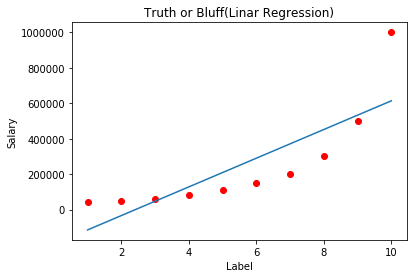

In [55]:
plt.scatter(X,Y,color = 'red')
plt.plot(X,lin_reg.predict(X))
plt.title('Truth or Bluff(Linar Regression)')
plt.xlabel("Label")
plt.ylabel('Salary')
plt.show()

### Visualizing the Polynomial Regression results

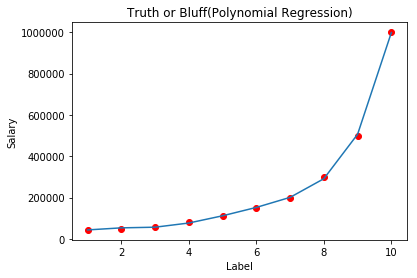

In [56]:
plt.scatter(X,Y,color = 'red')
X_grid = np.arange(min(X),max(X),0.1)
X_grid = X_grid.reshape((len(X_grid),1))
plt.plot(X,lin_reg2.predict(poly_reg.fit_transform(X)))
plt.title('Truth or Bluff(Polynomial Regression)')
plt.xlabel("Label")
plt.ylabel('Salary')
plt.show()

### Predicting the new salary using Linear Regression

In [64]:
lin_reg.predict([[6.5]])

array([330378.78787879])

### Predicting the new Salary using Polynomial Regression

In [66]:
lin_reg2.predict(poly_reg.fit_transform([[6.5]]))

array([174878.07765118])

### Result

The potential employee is in fact telling the truth hence the HR team can be happy about finding an honest employee for their company since the predicted value is pretty close to 160K
